In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import csv
import os
import shutil

# Define the base path where the folders containing audio files are located
base_path = 'openmic-2018/audio/'

# Define the destination path where you want to move the files
train_destination_path = 'dataset/train/'
test_destination_path = 'dataset/test/'

# Ensure the destination directory exists
# if not os.path.exists(train_destination_path):
#     os.makedirs(train_destination_path)
# if not os.path.exists(test_destination_path):
#     os.makedirs(test_destination_path)

# # Open and read the CSV file
# with open('openmic-2018/partitions/split01_train.csv') as csvfile:
#     filereader = csv.reader(csvfile)
#     for row in filereader:
#         # Extract the file name from the row (assuming there's no header and each row contains just the file name)
#         file_name = row[0]

#         # Construct the folder name from the first 3 characters of the file name
#         folder_name = file_name[:3]

#         # Construct the source path
#         source_path = os.path.join(base_path, folder_name, file_name + '.ogg')

#         # Construct the destination path
#         dest_file_path = os.path.join(train_destination_path, file_name + '.ogg')

#         # Move the file
#         shutil.move(source_path, dest_file_path)

#         print(f"Moved {source_path} to {dest_file_path}")
        
# # Open and read the CSV file
# with open('openmic-2018/partitions/split01_test.csv') as csvfile:
#     filereader = csv.reader(csvfile)
#     for row in filereader:
#         # Extract the file name from the row (assuming there's no header and each row contains just the file name)
#         file_name = row[0]

#         # Construct the folder name from the first 3 characters of the file name
#         folder_name = file_name[:3]

#         # Construct the source path
#         source_path = os.path.join(base_path, folder_name, file_name + '.ogg')

#         # Construct the destination path
#         dest_file_path = os.path.join(test_destination_path, file_name + '.ogg')

#         # Move the file
#         shutil.move(source_path, dest_file_path)

#         print(f"Moved {source_path} to {dest_file_path}")


In [3]:
#print how many files are in the train and test folders
print(len(os.listdir(train_destination_path)))
print(len(os.listdir(test_destination_path)))

14915
5085


In [4]:
amplitude_train_path = 'amplitude_spectrogram/train/'
amplitude_test_path = 'amplitude_spectrogram/test/'

In [6]:
for file in os.listdir(train_destination_path):
    y, sr = librosa.load(train_destination_path + file)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 8))
    img = librosa.display.specshow(D, sr=sr)
    #remove .ogg extension from the file name
    plt.savefig(amplitude_train_path + file[:-4] + ".png")
    plt.close()
    break

(800, 1200, 4)


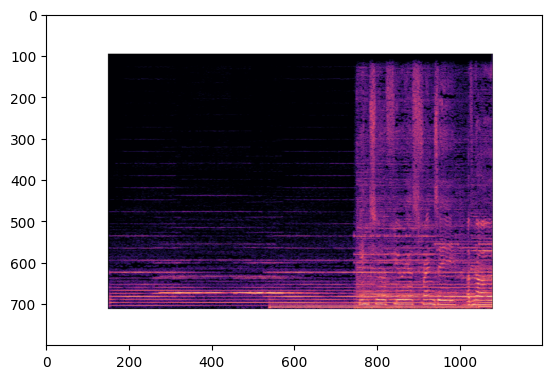

In [7]:
#load the image from the amplitude_spectrogram folder
img = plt.imread(amplitude_train_path + "000046_3840.png")
# img = img[:,:,:3]
plt.imshow(img)
#show the shape of the image
print(img.shape)

In [8]:
print(len(os.listdir(amplitude_train_path)))

746


In [ ]:
for file in os.listdir(test_destination_path):
    y, sr = librosa.load(test_destination_path + file)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.figure(figsize=(12, 8))
    img = librosa.display.specshow(D, sr=sr)
    #remove .ogg extension from the file name
    plt.savefig(amplitude_test_path + file[:-4] + ".png")
    plt.close()


In [ ]:
power_train_path = 'power_spectrogram/train/'
power_test_path = 'power_spectrogram/test/'

In [ ]:
for file in os.listdir(train_destination_path):
    y, sr = librosa.load(train_destination_path + file)
    # Compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(12, 8))
    img = librosa.display.specshow(log_S, sr=sr)
    #remove .ogg extension from the file name
    plt.savefig(power_train_path + file[:-4] + ".png")
    plt.close()
    break

(800, 1200, 4)


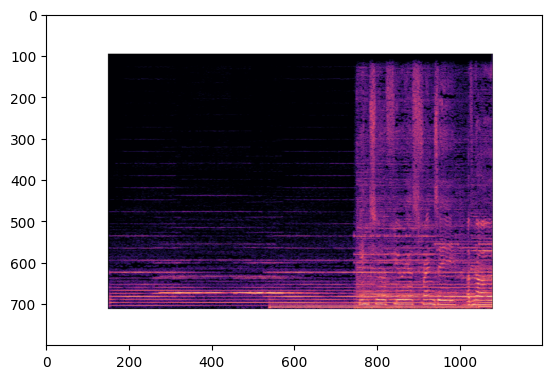

In [10]:
#load the image in the power_spectrogram folder
img = plt.imread(amplitude_train_path + '/000046_3840.png')
# img = img[:,:,:3]
plt.imshow(img)
#print the shape of the image
print(img.shape)

In [ ]:
for file in os.listdir(test_destination_path):
    y, sr = librosa.load(test_destination_path + file)
    # Compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)
    plt.figure(figsize=(12, 8))
    img = librosa.display.specshow(log_S, sr=sr, hop_length=512)
    #remove .ogg extension from the file name
    plt.savefig(power_test_path + file[:-4] + ".png")
    plt.close()

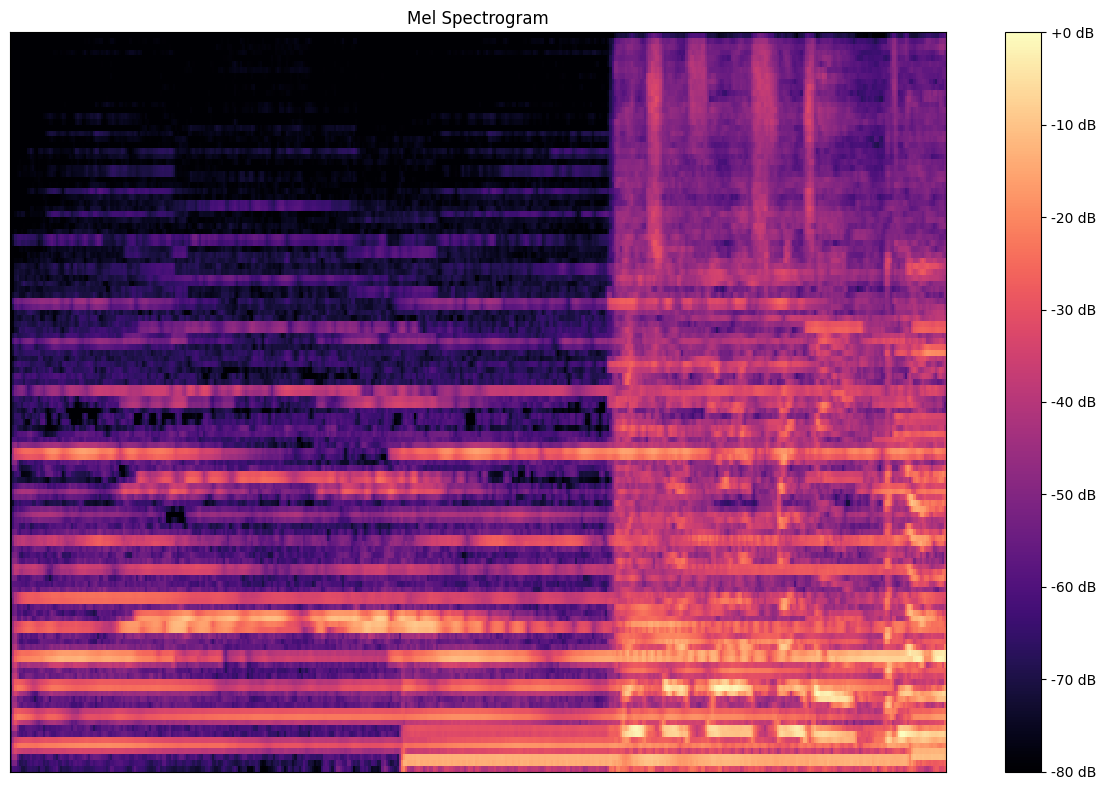

In [26]:
# Path to the .ogg audio file
audio_path = 'dataset/train/000046_3840.ogg'

# Load the audio file
y, sr = librosa.load(audio_path)

# Compute the Mel Spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)

# Convert to log scale (dB)
log_S = librosa.power_to_db(S, ref=np.max)

# Plotting the Mel Spectrogram
plt.figure(figsize=(12, 8))
librosa.display.specshow(log_S, sr=sr, hop_length=512)
plt.title('Mel Spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()



In [9]:
print("S.shape:", S.shape)
print("log_S.shape:", log_S.shape)
print(S)
print("\n\n")
print(log_S)

S.shape: (128, 431)
log_S.shape: (128, 431)
[[6.1718500e-05 7.2042621e-04 6.4434798e-04 ... 4.9466962e-01
  5.9556442e-01 1.0423824e+00]
 [2.3218599e-04 5.8982018e-03 6.7159031e-03 ... 1.8472856e+00
  1.6241658e+00 2.4544642e+00]
 [5.8495277e-04 3.3041131e-02 4.0843394e-02 ... 8.2536362e+01
  7.6770134e+01 6.0627102e+01]
 ...
 [3.2527414e-10 6.3706210e-08 3.8991948e-07 ... 2.2922698e-02
  2.3968874e-02 1.5717190e-02]
 [5.4002697e-10 1.3484038e-07 6.4662549e-07 ... 9.4757751e-03
  1.1776654e-02 9.9108266e-03]
 [1.4581478e-11 3.0564526e-09 3.0026353e-08 ... 4.6863162e-04
  6.0600939e-04 1.0198486e-03]]



[[-71.793365  -61.121624  -61.606316  ... -32.754368  -31.94823
  -29.517248 ]
 [-66.03916   -51.990326  -51.426476  ... -27.032179  -27.591215
  -25.797953 ]
 [-62.026314  -44.50697   -43.586304  ... -10.531067  -10.845596
  -11.8708515]
 ...
 [-80.        -80.        -80.        ... -46.094864  -45.901043
  -47.733772 ]
 [-80.        -80.        -80.        ... -49.931374  -48.9873
  

In [ ]:
#extract the corresponding label for the audio file
label_path = 'openmic-2018/metadata/magnatagatune/annotations_final.csv'